# haberman

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [2]:
data = pd.read_csv("haberman.csv")
data.head()

,Age of patient at time of operation,Patients year of operation,Number of positive axillary nodes detected,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
data.columns

Index(['Age of patient at time of operation', 'Patients year of operation',
       'Number of positive axillary nodes detected', 'Survival status'],
      dtype='object')

# Spliting Data for training and testing

In [4]:
from sklearn.model_selection import train_test_split
X_Data=data[['Age of patient at time of operation', 'Patients year of operation','Number of positive axillary nodes detected']]
y_Data=data[['Survival status']]
X_train,X_test,y_train,y_test = train_test_split(X_Data,y_Data,test_size=0.2,random_state=42)

# Decision Trees

In [5]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, np.ravel(y_train,order='C'))
predictDT=modelDT.predict(X_test)

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        47
           2       0.43      0.43      0.43        14

    accuracy                           0.74        61
   macro avg       0.63      0.63      0.63        61
weighted avg       0.74      0.74      0.74        61



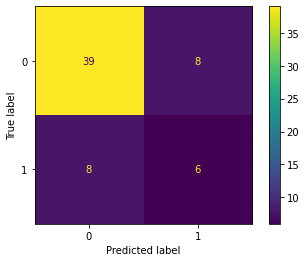

In [6]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictDT)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictDT))


# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train, np.ravel(y_train,order='C'))
predictRFC=modelRFC.predict(X_test)

              precision    recall  f1-score   support

           1       0.85      0.83      0.84        47
           2       0.47      0.50      0.48        14

    accuracy                           0.75        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.76      0.75      0.76        61



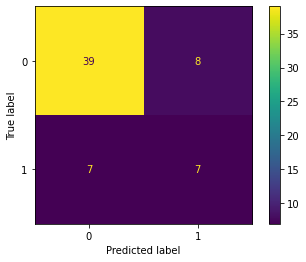

In [8]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictRFC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictRFC))

# Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, np.ravel(y_train,order='C'))
predictGNB=modelGNB.predict(X_test)

              precision    recall  f1-score   support

           1       0.81      0.91      0.86        47
           2       0.50      0.29      0.36        14

    accuracy                           0.77        61
   macro avg       0.66      0.60      0.61        61
weighted avg       0.74      0.77      0.75        61



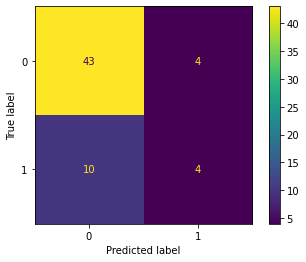

In [10]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictGNB)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictGNB))

# AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
modelAda = AdaBoostClassifier()
modelAda.fit(X_train, np.ravel(y_train,order='C'))
predictAda=modelAda.predict(X_test)

              precision    recall  f1-score   support

           1       0.84      0.87      0.85        47
           2       0.50      0.43      0.46        14

    accuracy                           0.77        61
   macro avg       0.67      0.65      0.66        61
weighted avg       0.76      0.77      0.76        61



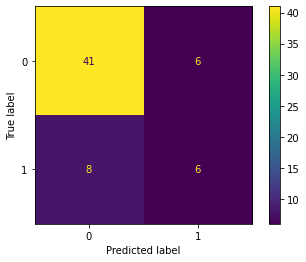

In [12]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictAda)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictAda))

# Data normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

#scaler.fit(y_train)
#y_train_normalized = scaler.transform(y_train)

scaler.fit(X_test)
X_test_normalized = scaler.transform(X_test)

scaler.fit(y_train)
y_test_normalized = scaler.transform(y_test)

# K-Nearest Neighbours

In [14]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN =  KNeighborsClassifier()
modelKNN.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictKNN=modelKNN.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       0.82      0.85      0.83        47
           2       0.42      0.36      0.38        14

    accuracy                           0.74        61
   macro avg       0.62      0.60      0.61        61
weighted avg       0.72      0.74      0.73        61



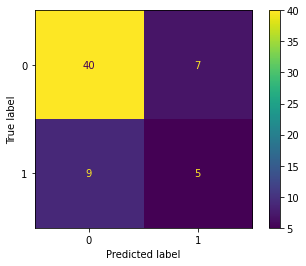

In [15]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictKNN)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictKNN))


# Support Vector Machine

In [16]:
#Support Vector Classifier
from sklearn.svm import SVC
modelSVC = SVC(probability= True)
modelSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictSVC=modelSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       0.76      0.89      0.82        47
           2       0.17      0.07      0.10        14

    accuracy                           0.70        61
   macro avg       0.47      0.48      0.46        61
weighted avg       0.63      0.70      0.66        61



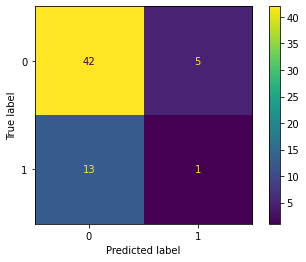

In [17]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictSVC))

In [18]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC
modelLSVC = LinearSVC()
modelLSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictLSVC=modelLSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       0.81      0.89      0.85        47
           2       0.44      0.29      0.35        14

    accuracy                           0.75        61
   macro avg       0.63      0.59      0.60        61
weighted avg       0.72      0.75      0.73        61



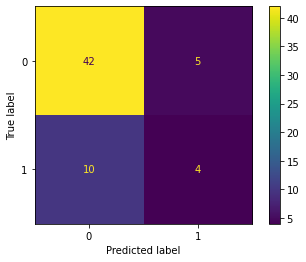

In [19]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictLSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictLSVC))

# Multi-Layer Perceptron

In [20]:
from sklearn.neural_network import MLPClassifier
modelMLP =  MLPClassifier()
modelMLP.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictMLP=modelMLP.predict(X_test_normalized)

              precision    recall  f1-score   support

           1       0.80      0.85      0.82        47
           2       0.36      0.29      0.32        14

    accuracy                           0.72        61
   macro avg       0.58      0.57      0.57        61
weighted avg       0.70      0.72      0.71        61



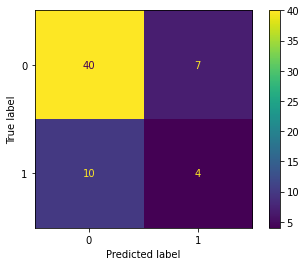

In [21]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictMLP)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictMLP))

# ROC and AUC 

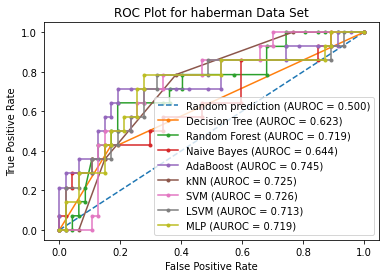

In [22]:
r_probs =[0 for _ in range(len(y_test_normalized))]
dt_probs=modelDT.predict_proba(X_test)
rf_probs=modelRFC.predict_proba(X_test)
nb_probs=modelGNB.predict_proba(X_test)
ada_probs=modelAda.predict_proba(X_test)
knn_probs=modelKNN.predict_proba(X_test_normalized)
svm_probs=modelSVC.predict_proba(X_test_normalized)
lsvm_probs=modelLSVC._predict_proba_lr(X_test_normalized)
mlp_probs=modelMLP.predict_proba(X_test_normalized)

dt_probs=dt_probs[:,1]
rf_probs=rf_probs[:, 1]
nb_probs=nb_probs[:, 1]
ada_probs=ada_probs[:, 1]
knn_probs=knn_probs[:, 1]
svm_probs=svm_probs[:, 1]
lsvm_probs=lsvm_probs[:, 1]
mlp_probs=mlp_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

r_auc=roc_auc_score(y_test,r_probs)
dt_auc= roc_auc_score(y_test,dt_probs)
rf_auc= roc_auc_score(y_test,rf_probs)
nb_auc= roc_auc_score(y_test,nb_probs)
ada_auc= roc_auc_score(y_test,ada_probs)
knn_auc= roc_auc_score(y_test,knn_probs)
svm_auc= roc_auc_score(y_test,svm_probs)
lsvm_auc= roc_auc_score(y_test,lsvm_probs)
mlp_auc= roc_auc_score(y_test,mlp_probs)

r_fpr,r_tpr, _ = roc_curve(y_test_normalized,r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test_normalized,dt_probs)
rf_fpr, rf_tpr, _= roc_curve(y_test_normalized,rf_probs)
nb_fpr, nb_tpr, _= roc_curve(y_test_normalized,nb_probs)
ada_fpr, ada_tpr, _= roc_curve(y_test_normalized,ada_probs)
knn_fpr, knn_tpr, _= roc_curve(y_test_normalized,knn_probs)
svm_fpr, svm_tpr, _= roc_curve(y_test_normalized,svm_probs)
lsvm_fpr, lsvm_tpr, _= roc_curve(y_test_normalized,lsvm_probs)
mlp_fpr, mlp_tpr, _= roc_curve(y_test_normalized,mlp_probs)

import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % ada_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='kNN (AUROC = %0.3f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lsvm_fpr, lsvm_tpr, marker='.', label='LSVM (AUROC = %0.3f)' % lsvm_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.3f)' % mlp_auc)

# Title
plt.title('ROC Plot for haberman Data Set')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()